# Breast Cancer Project Phase 1
Mohamad Ahmed Abdelmoniem 19P5170

Ziad Assem Shafik 19P6363  

Karim Ashraf 19P6044

Mohamed Fathy 19P4704  

Yassin Khaled Mahgub 19P9597

Ahmed Mohsen 19P1150


## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

## Reading the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('breast-cancer.csv')

In [3]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

## Data Preprocessing Steps

In [4]:
# 1. Remove unnecessary columns
df.drop('id', axis=1, inplace=True)

In [5]:
# 2. Check for missing values
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# 3. Encode categorical labels
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
print(df['diagnosis'])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [7]:
# 4. Feature Scaling
features = df.columns.drop('diagnosis')
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.3

## Outlier Detection

In [8]:
# Calculate IQR for each feature
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

In [9]:
# Detect outliers using the IQR method
outlier_condition = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outlier_condition]
print(f"Original dataset size: {len(df)}, Cleaned dataset size: {len(df_cleaned)}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

Original dataset size: 569, Cleaned dataset size: 398
Number of outliers removed: 171


## Visualization

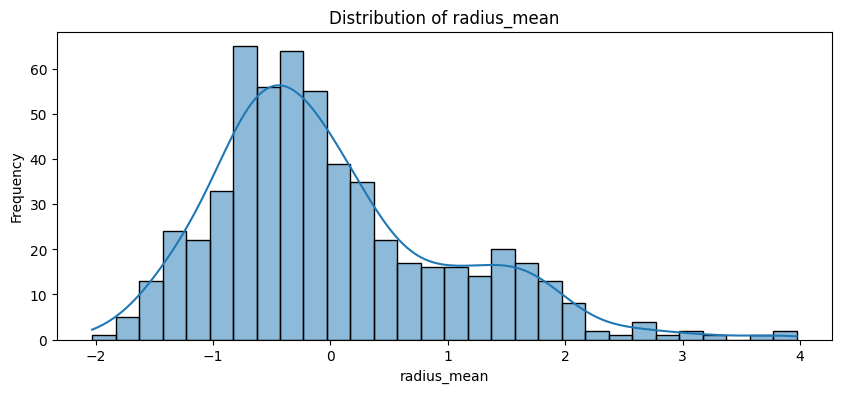

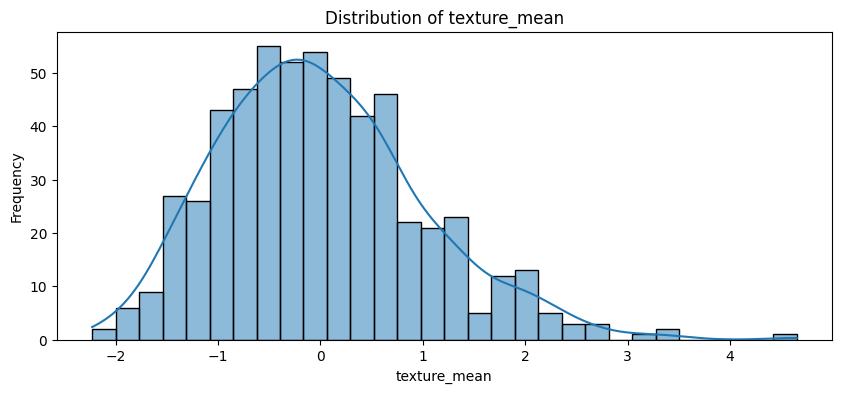

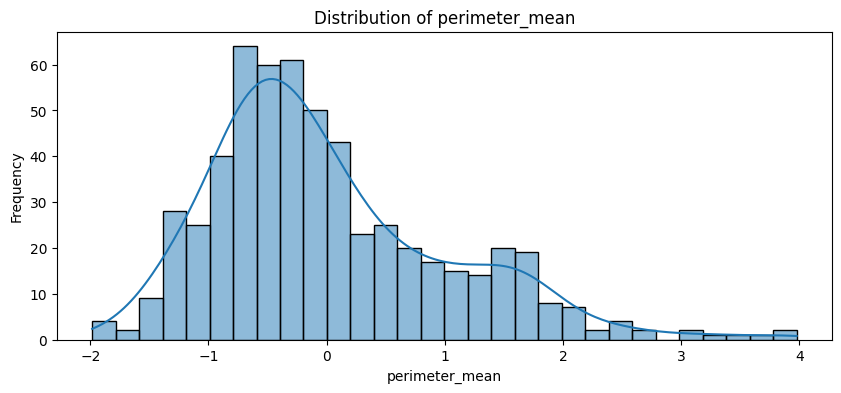

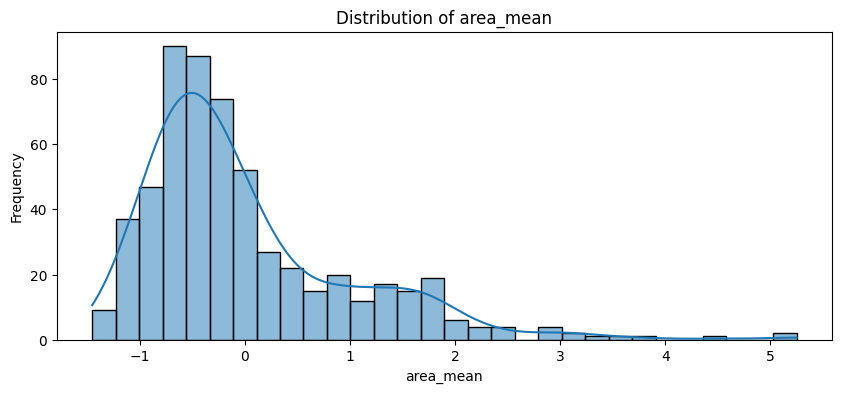

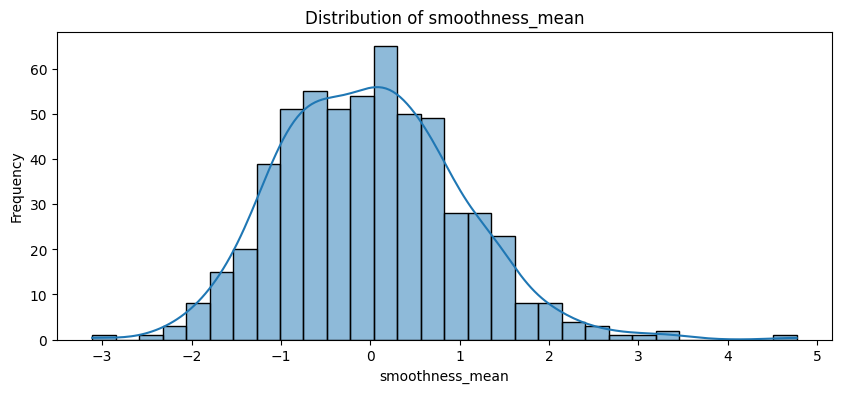

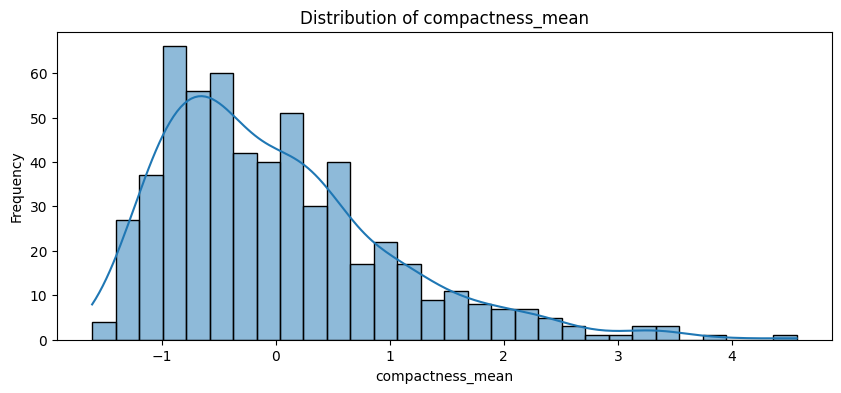

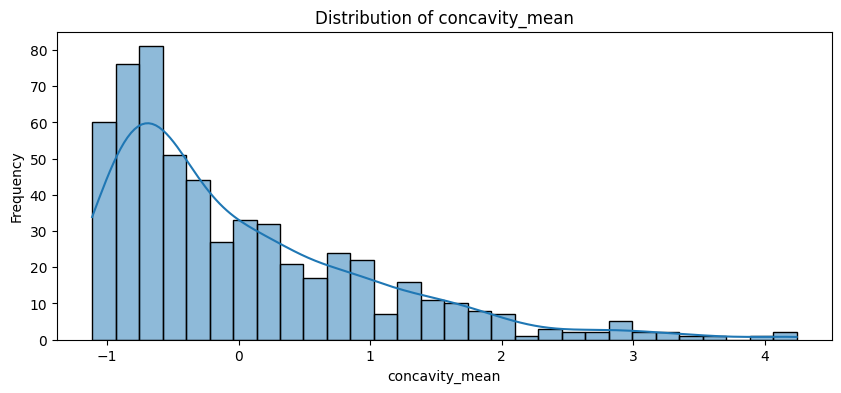

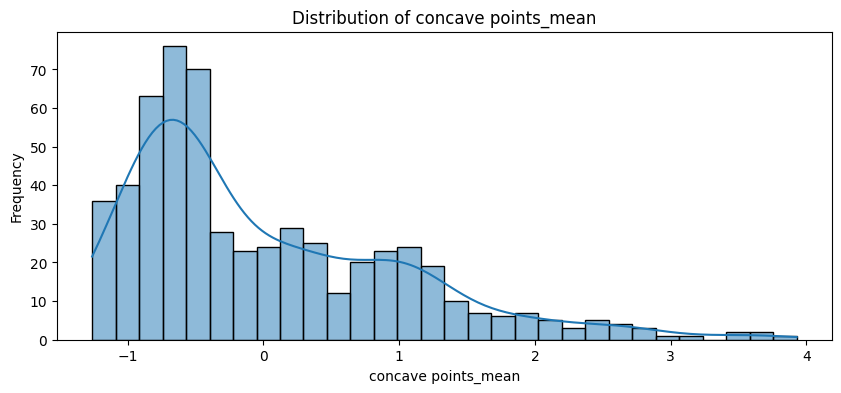

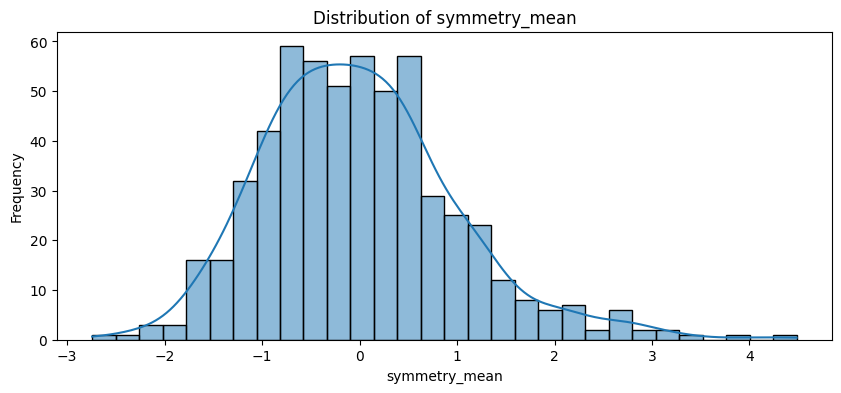

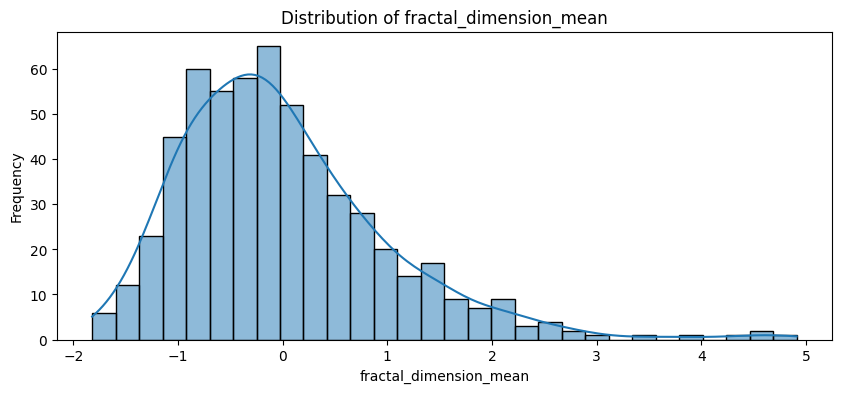

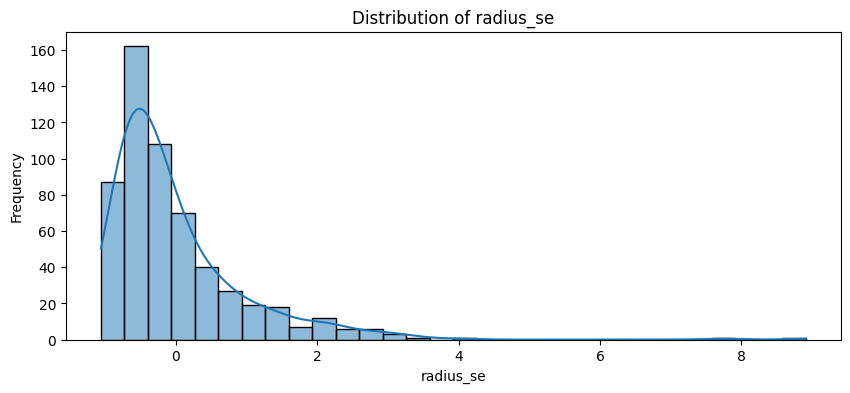

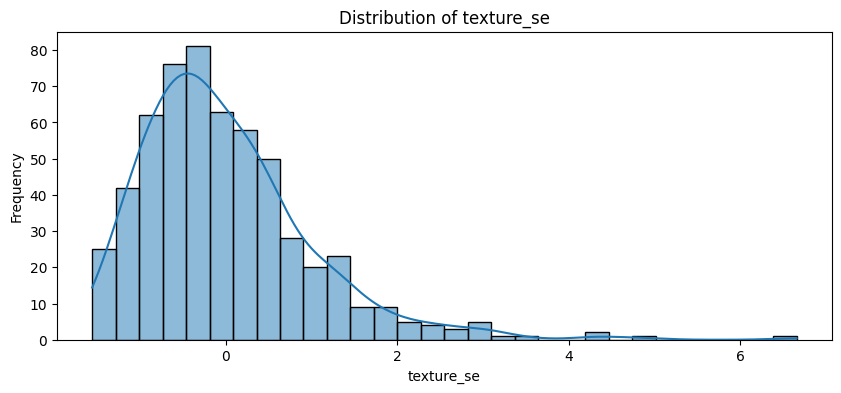

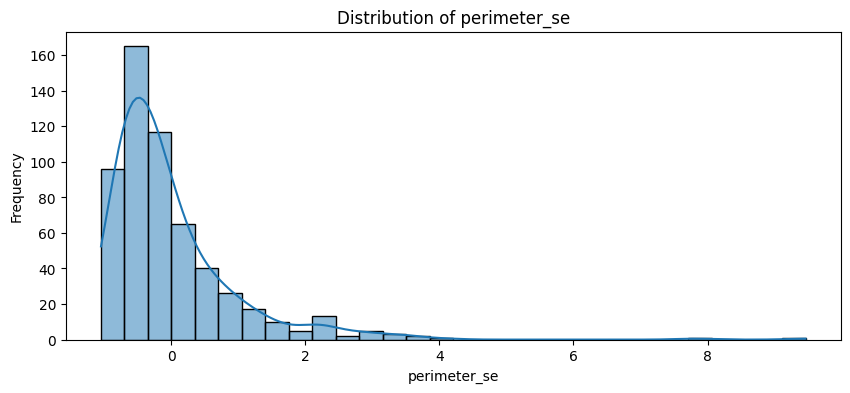

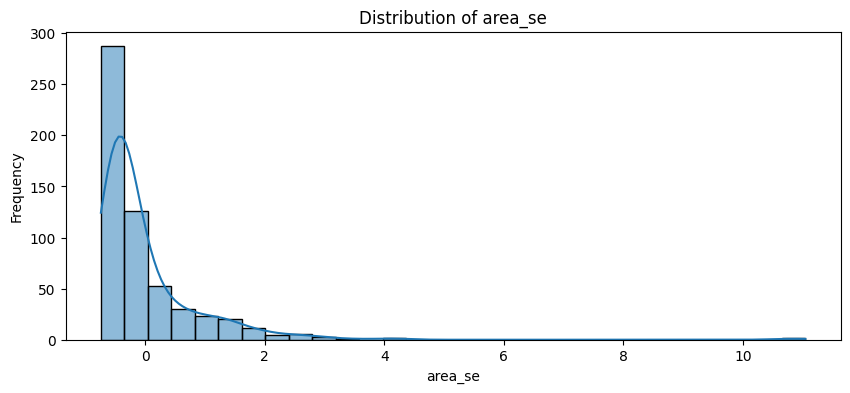

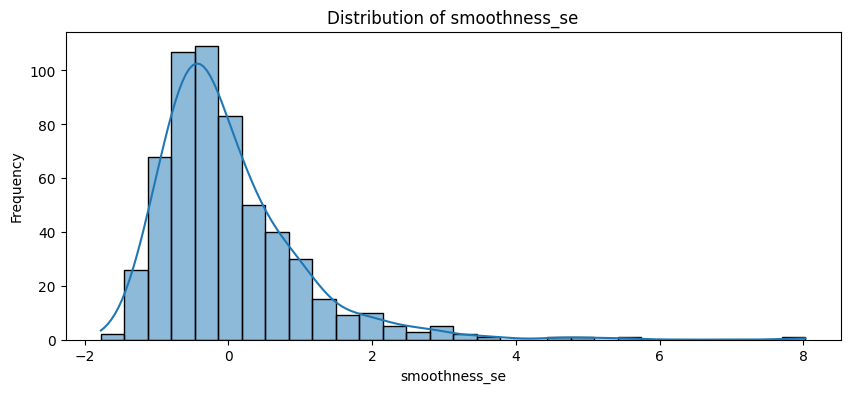

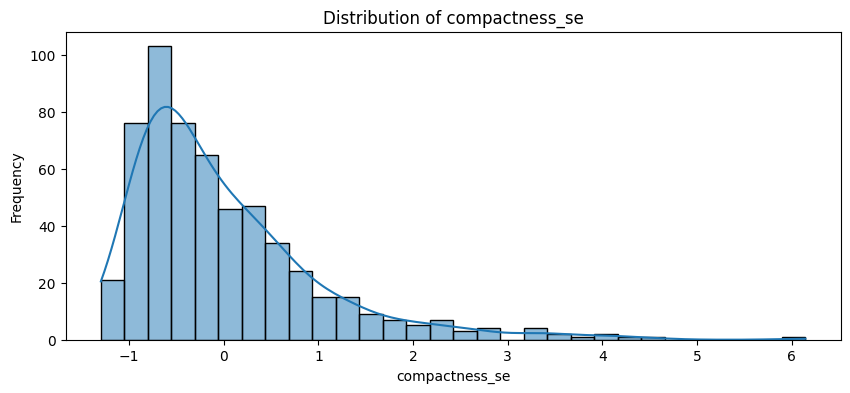

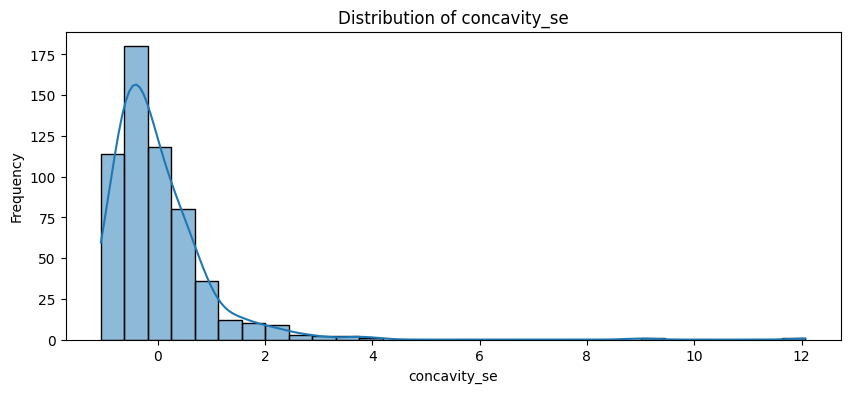

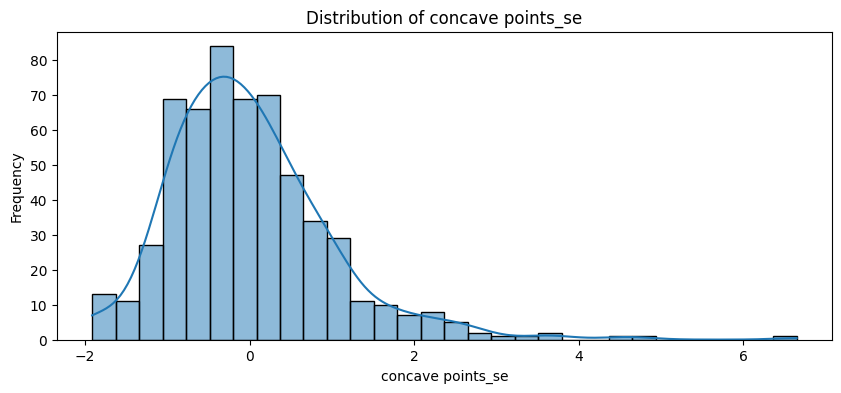

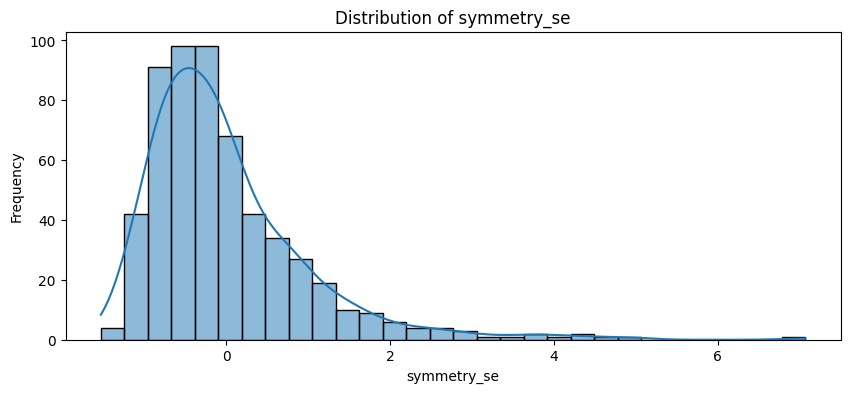

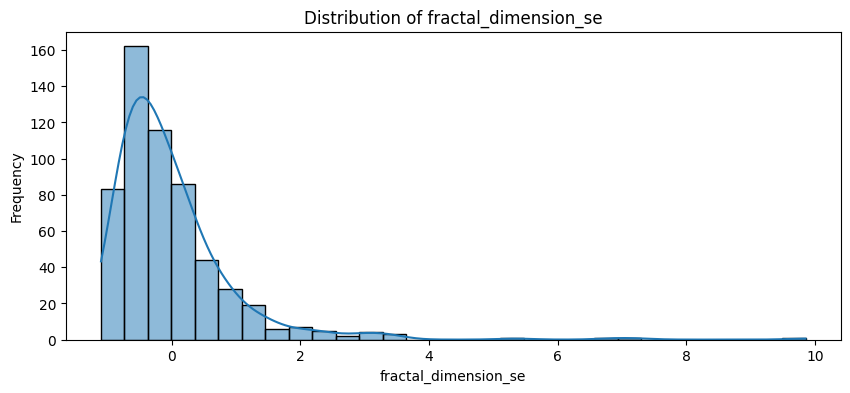

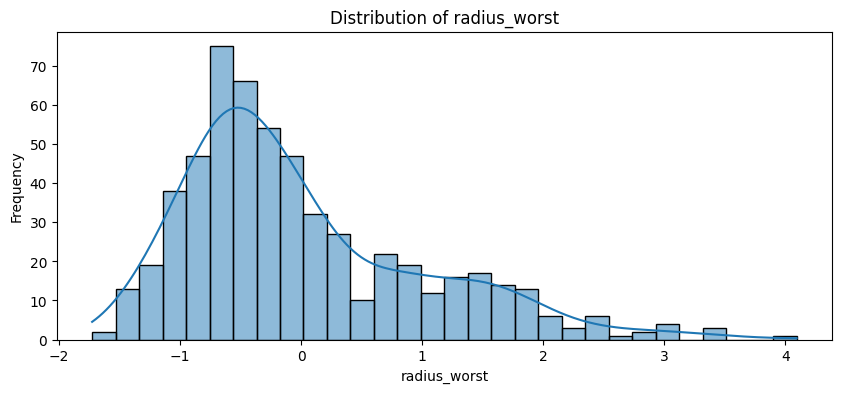

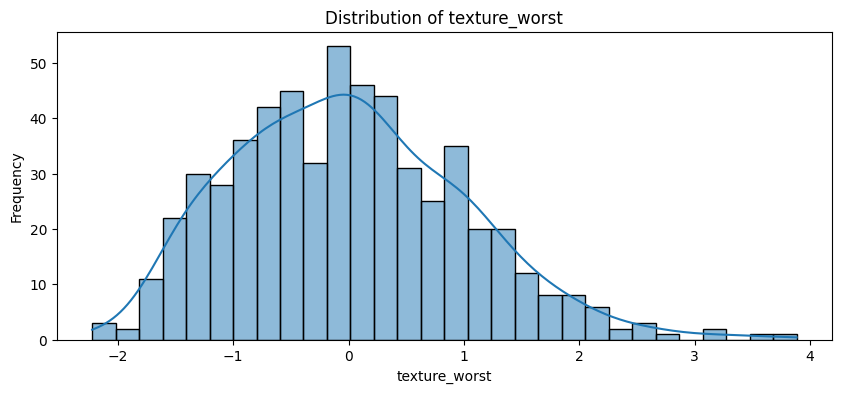

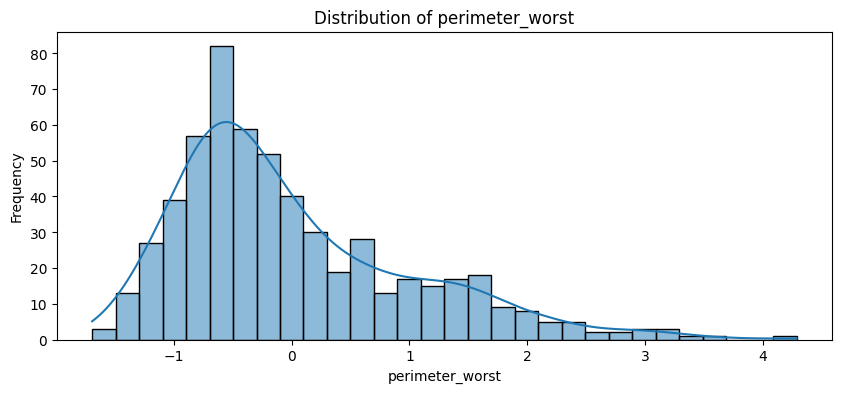

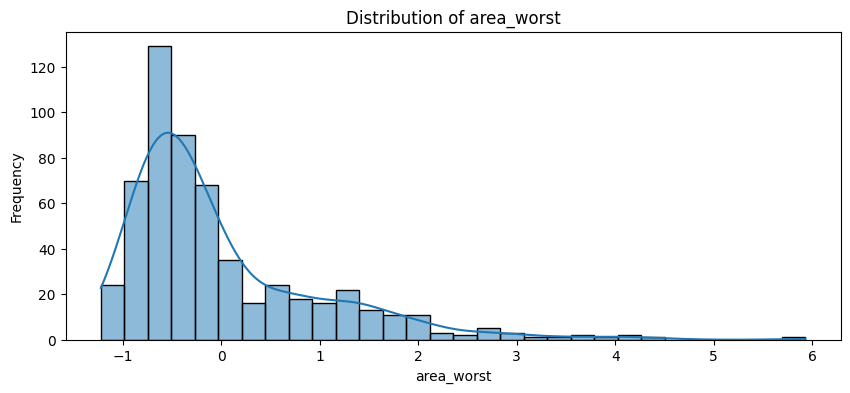

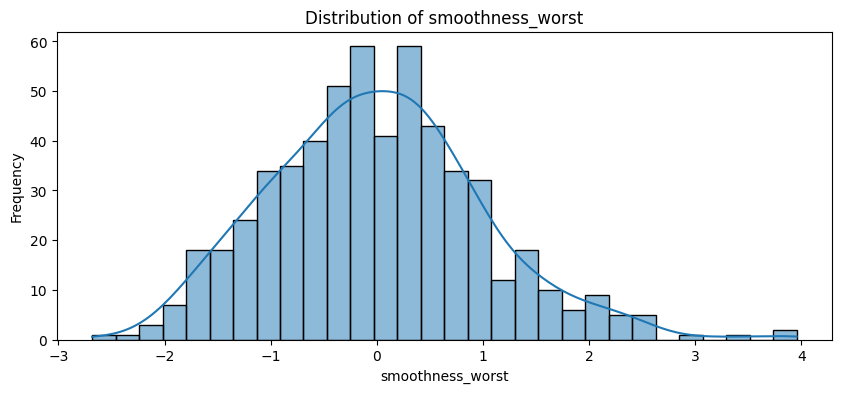

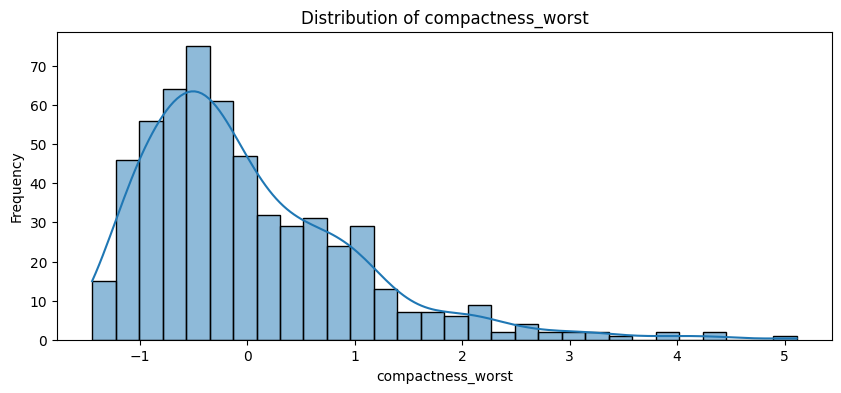

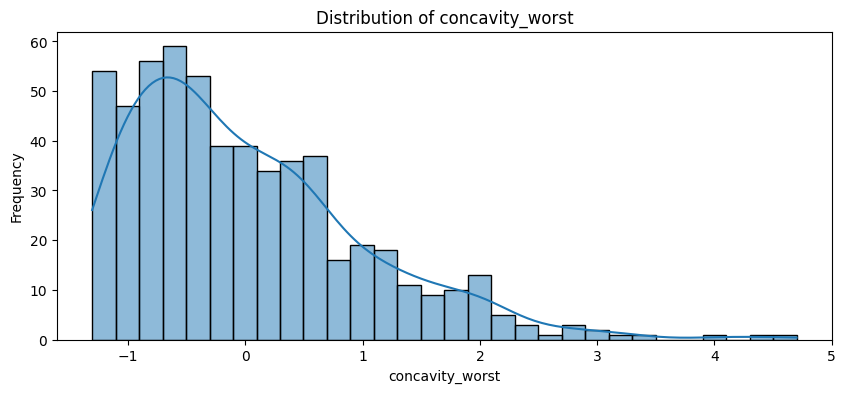

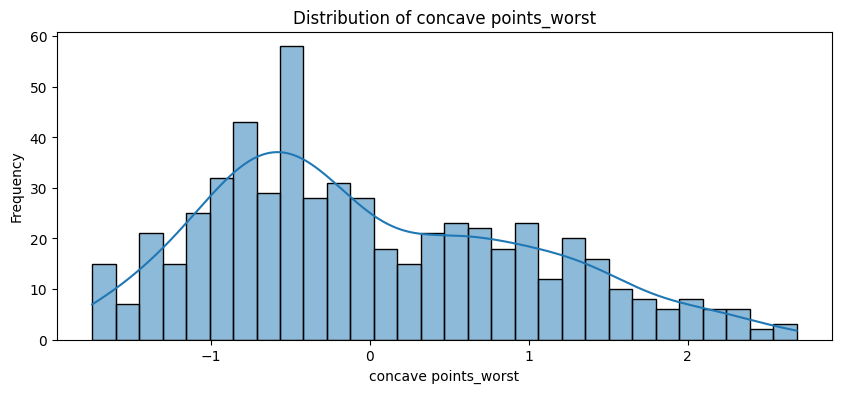

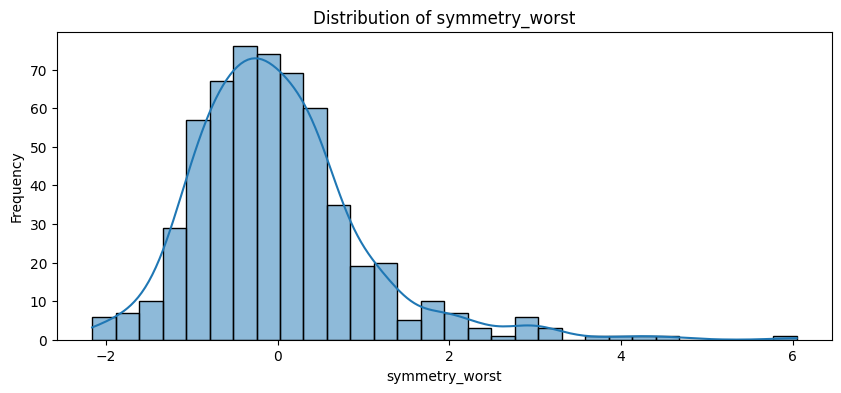

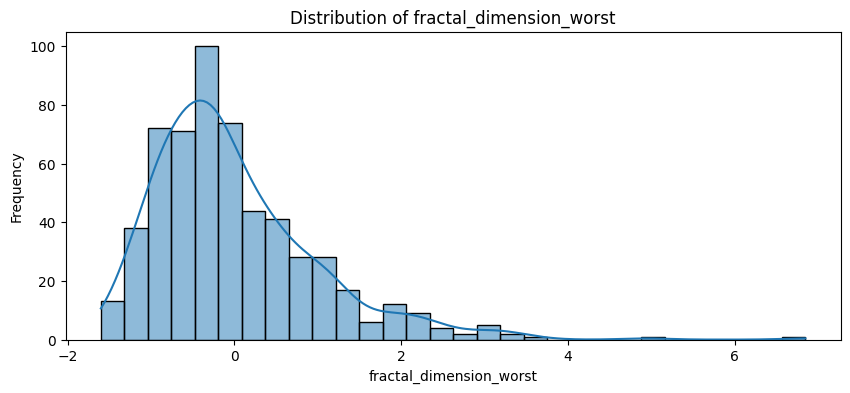

In [10]:
# Visualization of the distribution of features (Histograms for each feature)
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

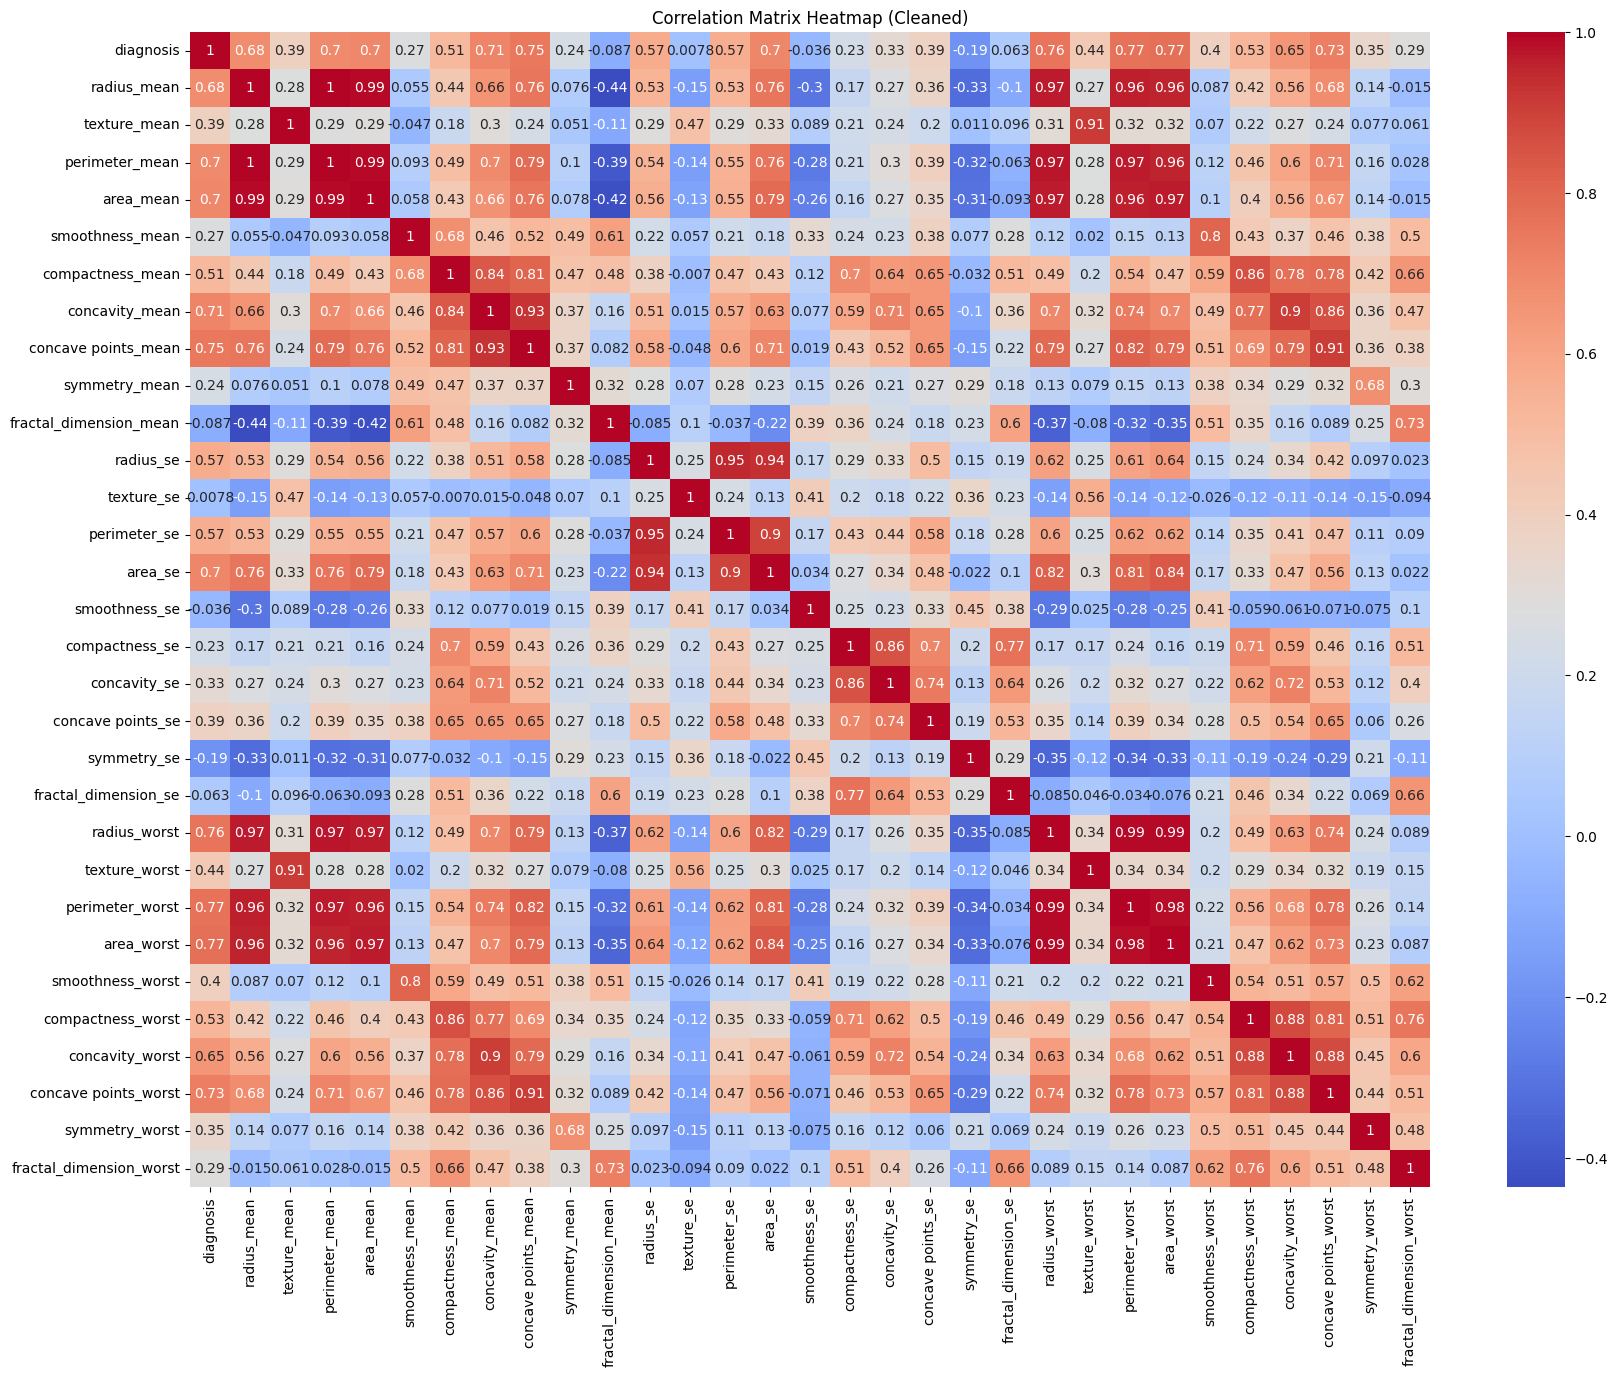

In [11]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix_cleaned = df_cleaned.corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Cleaned)')
plt.show()

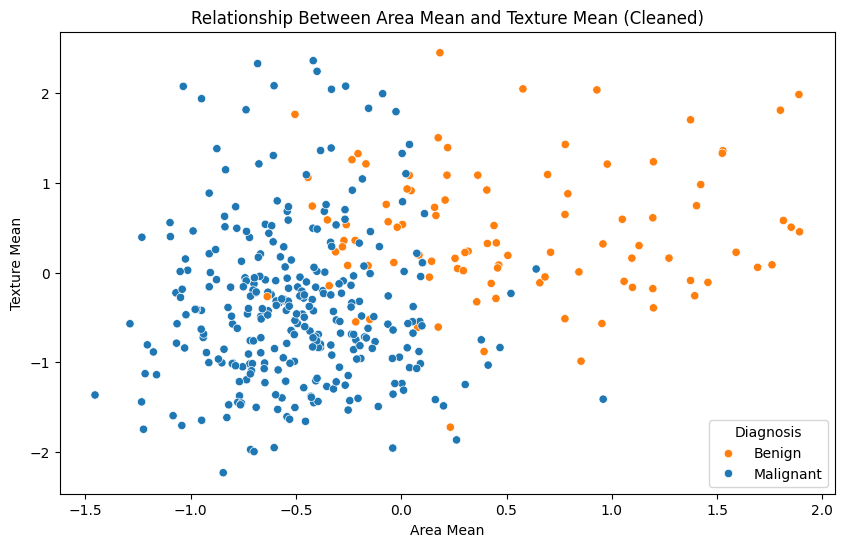

In [12]:
# Scatter plot to visualize relationships between two variables in the cleaned dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='area_mean', y='texture_mean', hue='diagnosis')
plt.title('Relationship Between Area Mean and Texture Mean (Cleaned)')
plt.xlabel('Area Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()


# Phase 2

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
# split the dataset into training and testing and validate set

X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-mediods

In [ ]:
def map_cluster_labels_to_class_labels(kmedoids, labels):
    """
    Map the cluster labels to actual class labels based on majority in the cluster.
    """
    cluster_labels = kmedoids.labels_
    unique_clusters = np.unique(cluster_labels)
    label_mapping = {}
    for cluster in unique_clusters:
        # Find the most common class label in each cluster
        mask = cluster_labels == cluster
        target_labels = labels[mask]
        most_common = np.bincount(target_labels).argmax()
        label_mapping[cluster] = most_common
    return label_mapping

def apply_mapping_and_evaluate(y_pred, mapping):
    """
    Apply the mapping to the predicted cluster labels to get the predicted class labels.
    """
    return np.array([mapping[cluster] for cluster in y_pred])

def kmediods_clustering_and_classification(X_train, X_test, y_train, y_test):

    # Initialize KMedoids
    kmedoids = KMedoids(n_clusters=2, random_state=42, metric='euclidean')
    kmedoids.fit(X_train)

    # Predicting the clusters
    y_train_pred_clusters = kmedoids.predict(X_train)
    y_test_pred_clusters = kmedoids.predict(X_test)

    # Mapping clusters to class labels based on training data
    cluster_to_class_labels = map_cluster_labels_to_class_labels(kmedoids, y_train)

    # Applying the cluster-to-class label mapping
    y_train_pred = apply_mapping_and_evaluate(y_train_pred_clusters, cluster_to_class_labels)
    y_test_pred = apply_mapping_and_evaluate(y_test_pred_clusters, cluster_to_class_labels)

    # Performance evaluation
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Confusion Matrix on Test Data:\n{confusion_matrix(y_test, y_test_pred)}")
    
    

    return y_test_pred
    

In [ ]:
results = kmediods_clustering_and_classification(X_train, X_test, y_train, y_test)

Train Accuracy: 0.7704402515723271
Test Accuracy: 0.6875
Confusion Matrix on Test Data:
[[55  0]
 [25  0]]


### Decision Tree

In [ ]:
def train_decision_tree(X_train, X_test, y_train, y_test):
    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)

    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_clf = grid_search.best_estimator_

    # Print best parameters
    print("Best Parameters:", best_params)

    # Predict on the test set
    y_pred = best_clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Return best classifier
    return best_clf

In [ ]:
best_clf = train_decision_tree(X_train, X_test, y_train, y_test)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.9375
Precision: 0.9166666666666666
Recall: 0.88
F1 Score: 0.8979591836734694


[Text(0.5, 0.9, 'x[20] <= 0.111\ngini = 0.354\nsamples = 318\nvalue = [245, 73]'), Text(0.3076923076923077, 0.7, 'x[27] <= 0.311\ngini = 0.106\nsamples = 250\nvalue = [236, 14]'), Text(0.15384615384615385, 0.5, 'x[14] <= -1.249\ngini = 0.009\nsamples = 227\nvalue = [226, 1]'), Text(0.07692307692307693, 0.3, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'), Text(0.23076923076923078, 0.3, 'gini = 0.0\nsamples = 223\nvalue = [223, 0]'), Text(0.46153846153846156, 0.5, 'x[1] <= 0.037\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'), Text(0.38461538461538464, 0.3, 'x[13] <= -0.405\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'), Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'), Text(0.46153846153846156, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'), Text(0.5384615384615384, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'), Text(0.6923076923076923, 0.7, 'x[21] <= -0.939\ngini = 0.23\nsamples = 68\nvalue = [9, 59]'), Text(0.6153846153846154, 0.5, 'gini = 0.346\nsamples = 9

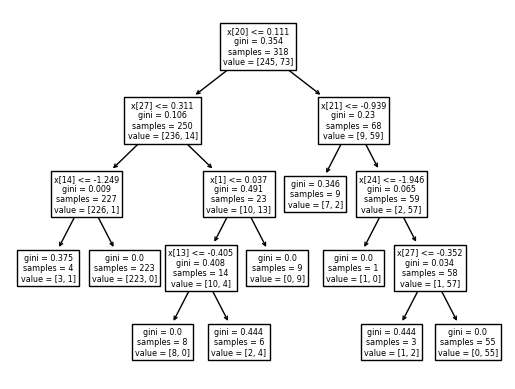

In [ ]:
print(plot_tree(best_clf))

### K-Means

In [ ]:
def kmeans(X_train, X_test, y_train, y_test, n_clusters=2):
    print("#---------------------------------------------kmeans----------------------------------------------")

    # Create a kmeans clustering model and fit on the training data
    kmeans = KMeans(n_clusters=n_clusters).fit(X_train)

    # Get labels for each point in training data
    y_predict = np.array(kmeans.labels_)

    # Flip the 0s to 1s and vice versa
    y_predict_flipped = np.where((y_predict==0)|(y_predict==1), y_predict^1, y_predict)

    # Test the model on the test data
    y_predict_test = KMeans.predict(kmeans, X_test)

    # Flip the 0s to 1s and vice versa
    y_predict_test_flipped = np.where((y_predict_test==0)|(y_predict_test==1), y_predict_test^1, y_predict_test)

    # Evaluate the performance of the model on both training and testing data
    train_acc = max(accuracy_score(y_train, y_predict), accuracy_score(y_train, y_predict_flipped))
    test_acc = max(accuracy_score(y_test, y_predict_test),accuracy_score(y_test, y_predict_test_flipped))

    print("Training data labels: ")
    print(kmeans.labels_)
    print("---------------------------------------------------------------------")
    print("Cluster Centers")
    print(kmeans.cluster_centers_)
    print("---------------------------------------------------------------------")
    print("Training Accuracy: ", "{:.4f}".format(train_acc*100), "%")
    print("Testing Accuracy: ", "{:.4f}".format(test_acc*100), "%")

    # Reduce training data to 2 features using pca to plot results
    pca = PCA(n_components=2)

    X_train_plt = pca.fit_transform(X_train)

    kmeans_plt = KMeans(n_clusters=n_clusters).fit(X_train_plt)

    # Generate a scatter plot graph for 2 clusters and their centers
    
    plt.scatter(X_train_plt[:, 0][kmeans_plt.labels_ == 0], X_train_plt[:, 1][kmeans_plt.labels_ == 0], s=3, c='r')
    plt.scatter(X_train_plt[:, 0][kmeans_plt.labels_ == 1], X_train_plt[:, 1][kmeans_plt.labels_ == 1], s=3, c='b')
    plt.plot(kmeans_plt.cluster_centers_[0][0], kmeans_plt.cluster_centers_[0][1], marker="x", markersize=10, markeredgecolor="black")
    plt.plot(kmeans_plt.cluster_centers_[1][0], kmeans_plt.cluster_centers_[1][1], marker="x", markersize=10, markeredgecolor="black")

    plt.show()

    # Convert class labels from integer to string format
    y_true_str = ["Benign" if label == 0 else "Malignant" for label in y_test]
    if accuracy_score(y_test, y_predict_test) > accuracy_score(y_test, y_predict_test_flipped):
        y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test]
    else:
        y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test_flipped]

    # Generate a confusion matrix plot
    cm = confusion_matrix(y_true_str, y_pred_str, labels=["Benign", "Malignant"])
    cm_labels = {"Benign": "Benign", "Malignant": "Malignant"}
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
                cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray')
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.ax.tick_params(labelsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)
    plt.tight_layout()
    plt.show()

#---------------------------------------------kmeans----------------------------------------------
Training data labels: 
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
---------------------------------------------------------------------
Cluster Centers
[[-0.51188261 -0.34881639 -0.53420962 -0.50760299 -0.43623323 -0.6366763
  -0.65565709 -0.67779953 -0.41533902 -0.25468814 -0.5003679  -0.18623363

c:\users\yassin\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\yassin\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


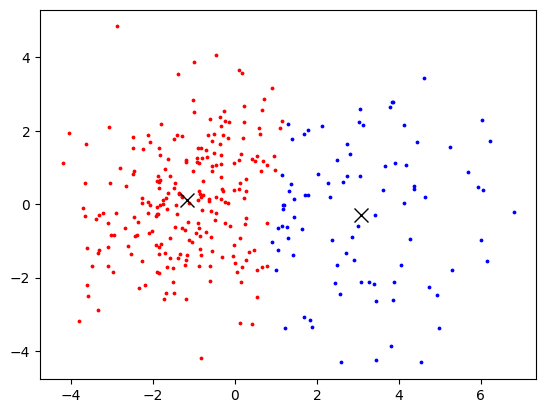

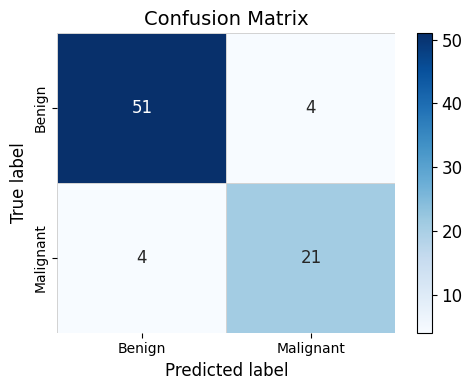

In [ ]:
kmeans(X_train, X_test, y_train, y_test)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_naive_bayes(X_train, X_test, y_train, y_test):
   

    # Initialize Gaussian Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Train the classifier
    nb_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = nb_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    

    # Return trained classifier
    return nb_classifier

X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = train_naive_bayes(X_train, X_test, y_train, y_test)


Accuracy: 0.9125
Precision: 0.8461538461538461
Recall: 0.88
F1 Score: 0.8627450980392156


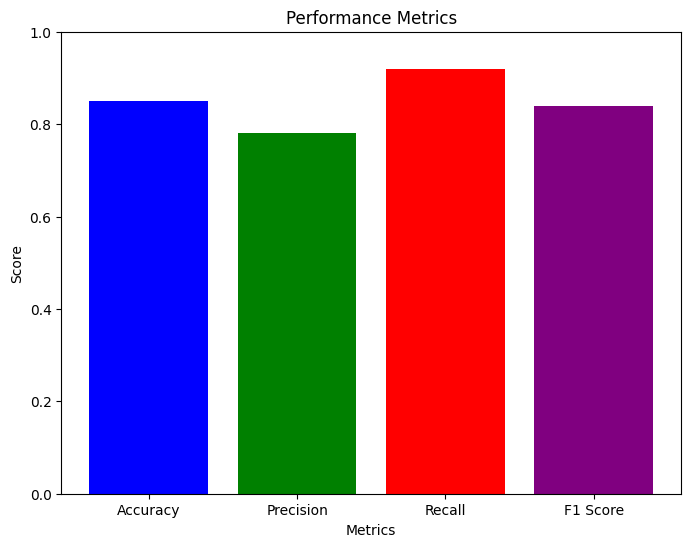

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot performance metrics
def plot_metrics(accuracy, precision, recall, f1):
    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
    plt.title('Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    plt.show()

# Assuming you have computed these metrics
accuracy = 0.85
precision = 0.78
recall = 0.92
f1 = 0.84

# Plotting the metrics
plot_metrics(accuracy, precision, recall, f1)
